In [1]:

from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read the dataset

In [2]:

import pandas as pd

df = pd.read_csv('train_titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Step 2 : Perform Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
m = df.isna().sum()
m[m>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### Step 3: Seperate X and Y (Survived)
#### Drop Passenger Id, Name, Ticket Number as these are satistically insignificant
#### Drop cabin column because it has too many missing values

In [7]:
X = df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'])
Y = df[['Survived']]

In [8]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


### Step 4 : Perform preprocessing on X

In [10]:

cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])
     

In [11]:
cat

['Sex', 'Embarked']

In [12]:
con

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [13]:

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:

num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scaler', StandardScaler())])

In [15]:
cat_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')), ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))]).set_output(transform='pandas')
     

In [16]:

pre = ColumnTransformer([('num', num_pipe, con), ('cat', cat_pipe, cat)]).set_output(transform='pandas')

In [17]:

X_pre = pre.fit_transform(X)
X_pre.head()
     

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,-0.565736,0.432793,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
1,-1.566107,0.663861,0.432793,-0.473674,0.786845,1.0,0.0,1.0,0.0,0.0
2,0.827377,-0.258337,-0.474545,-0.473674,-0.488854,1.0,0.0,0.0,0.0,1.0
3,-1.566107,0.433312,0.432793,-0.473674,0.420730,1.0,0.0,0.0,0.0,1.0
4,0.827377,0.433312,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


### Step 5: Apply train test split

In [18]:


from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [19]:


xtrain.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
331,-1.566107,1.240235,-0.474545,-0.473674,-0.074583,0.0,1.0,0.0,0.0,1.0
733,-0.369365,-0.488887,-0.474545,-0.473674,-0.386671,0.0,1.0,0.0,0.0,1.0
382,0.827377,0.202762,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
704,0.827377,-0.258337,0.432793,-0.473674,-0.490280,0.0,1.0,0.0,0.0,1.0
813,0.827377,-1.795334,3.154809,2.008933,-0.018709,1.0,0.0,0.0,0.0,1.0


In [20]:

xtest.head()

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
709,0.827377,-0.104637,0.432793,0.767630,-0.341452,0.0,1.0,1.0,0.0,0.0
439,-0.369365,0.125912,-0.474545,-0.473674,-0.437007,0.0,1.0,0.0,0.0,1.0
840,0.827377,-0.719436,-0.474545,-0.473674,-0.488854,0.0,1.0,0.0,0.0,1.0
720,-0.369365,-1.795334,-0.474545,0.767630,0.016023,1.0,0.0,0.0,0.0,1.0
39,0.827377,-1.180535,0.432793,-0.473674,-0.422074,1.0,0.0,1.0,0.0,0.0


In [21]:

ytrain.head()

,Survived
331,0
733,0
382,0
704,0
813,0


In [22]:

ytest.head()

,Survived
709,1
439,0
840,0
720,1
39,1


In [23]:

xtrain.shape

(712, 10)

In [24]:

xtest.shape

(179, 10)

### Step 6 : Build the model

In [25]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=1, criterion='gini', max_depth=1, min_samples_leaf=5, min_samples_split=5)
model1.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=1, min_samples_leaf=5, min_samples_split=5,
                       n_estimators=1)

In [26]:
model1.score(xtrain, ytrain)

0.672752808988764

In [28]:
model1.score(xtest, ytest)

0.7039106145251397

In [29]:
params1 = {
    'n_estimators' : [10,50, 100,200],
    'max_depth' : [1,2,3,4,5,6,7],
    'min_samples_split' : [5,6,7,8,9,10]
}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
rfc = RandomForestClassifier()
rscv1 = RandomizedSearchCV(rfc, param_distributions=params1, cv=5, scoring='f1_macro')
rscv1.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7],
                                        'min_samples_split': [5, 6, 7, 8, 9,
                                                              10],
                                        'n_estimators': [10, 50, 100, 200]},
                   scoring='f1_macro')

In [31]:
rscv1.best_params_

{'n_estimators': 10, 'min_samples_split': 7, 'max_depth': 6}

In [32]:
rscv1.best_score_

np.float64(0.809371129589584)

In [33]:
best_rfc = rscv1.best_estimator_
best_rfc

RandomForestClassifier(max_depth=6, min_samples_split=7, n_estimators=10)

In [34]:
best_rfc.score(xtrain, ytrain)

0.8637640449438202

In [35]:
best_rfc.score(xtest, ytest)

0.7988826815642458

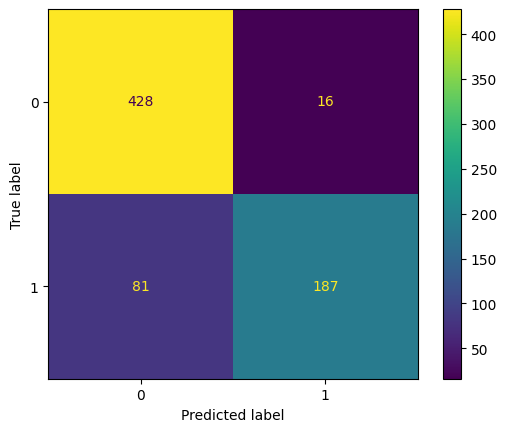

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rfc, xtrain, ytrain)

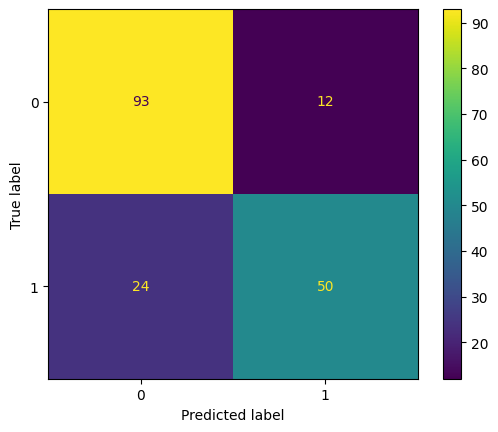

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(best_rfc, xtest, ytest)

In [38]:
ypred_train = best_rfc.predict(xtrain)
ypres_test = best_rfc.predict(xtest)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypres_test))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       105
           1       0.81      0.68      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



### Gradient Boosting model

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier(learning_rate=0.5, n_estimators=1, min_samples_leaf=5, min_samples_split=5 )
model2.fit(xtrain, ytrain)

GradientBoostingClassifier(learning_rate=0.5, min_samples_leaf=5,
                           min_samples_split=5, n_estimators=1)

In [42]:
model2.score(xtrain, ytrain)

0.8117977528089888

In [43]:
model2.score(xtest, ytest)

0.770949720670391

In [44]:
params2 = {
    'learning_rate' : [0.01, 0.05, 0.1, 0.2],
    'n_estimators' : [10,50,100,200,300],
    'max_depth' : [2,3,4,5,6,7]
}

In [45]:
gbc = GradientBoostingClassifier()
rscv2 = RandomizedSearchCV(gbc, param_distributions=params2,cv=5, scoring='f1_macro' )
rscv2.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7],
                                        'n_estimators': [10, 50, 100, 200,
                                                         300]},
                   scoring='f1_macro')

In [46]:
 rscv2.best_params_

{'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05}

In [47]:
rscv2.best_score_

np.float64(0.8085939400885515)

In [48]:
best_gbc = rscv2.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.05)

In [49]:
best_gbc.score(xtrain, ytrain)

0.8721910112359551

In [50]:
best_gbc.score(xtest, ytest)

0.8044692737430168

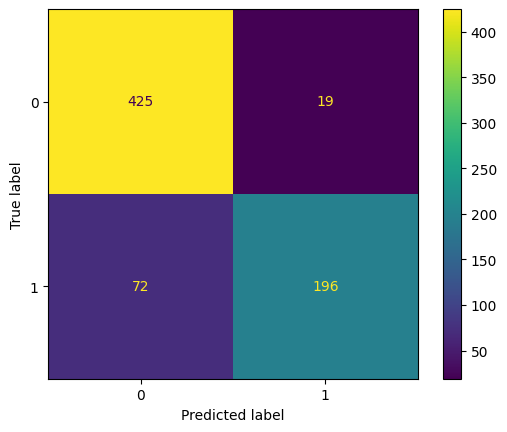

In [51]:
ConfusionMatrixDisplay.from_estimator(best_gbc, xtrain, ytrain)

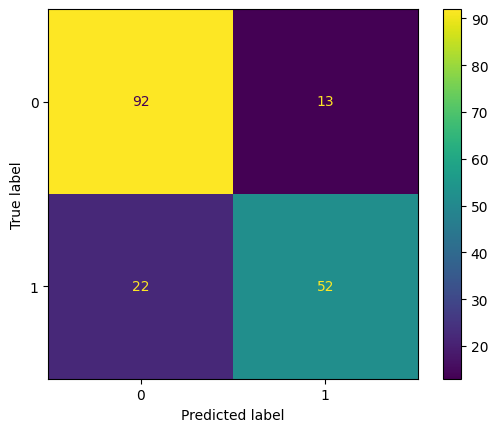

In [53]:
ConfusionMatrixDisplay.from_estimator(best_gbc, xtest, ytest)

In [54]:
ypred_train2 = best_gbc.predict(xtrain)
ypred_test2 = best_gbc.predict(xtest)

In [56]:
print(classification_report(ytest, ypred_test2))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### Gradient boosting model is slightly better in this case and accuracy is more than 80% in test
### Choosing gradient boosting model for final out of sample predictions
### plot the feature importance

In [57]:

best_gbc.feature_importances_

array([0.1659625 , 0.10583824, 0.0542414 , 0.00482658, 0.1322331 ,
       0.27084218, 0.24683119, 0.00282353, 0.00106066, 0.01534063])

In [58]:
xtrain.columns

Index(['num__Pclass', 'num__Age', 'num__SibSp', 'num__Parch', 'num__Fare',
       'cat__Sex_female', 'cat__Sex_male', 'cat__Embarked_C',
       'cat__Embarked_Q', 'cat__Embarked_S'],
      dtype='object')

In [59]:
imp = pd.Series(best_gbc.feature_importances_, index= xtrain.columns)

In [60]:
imp

num__Pclass        0.165962
num__Age           0.105838
num__SibSp         0.054241
num__Parch         0.004827
num__Fare          0.132233
cat__Sex_female    0.270842
cat__Sex_male      0.246831
cat__Embarked_C    0.002824
cat__Embarked_Q    0.001061
cat__Embarked_S    0.015341
dtype: float64

<Axes: >

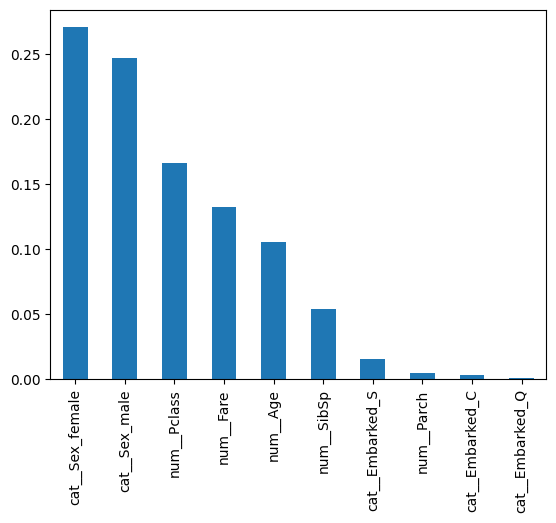

In [61]:

imp.sort_values(ascending=False).plot(kind='bar')

### Predict out of sample predictions

In [62]:
xnew = pd.read_csv('test_titanic.csv')
xnew

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [63]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'Embarked'])])

In [64]:
xnew_pre = pre.transform(xnew)
xnew_pre

,num__Pclass,num__Age,num__SibSp,num__Parch,num__Fare,cat__Sex_female,cat__Sex_male,cat__Embarked_C,cat__Embarked_Q,cat__Embarked_S
0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0.0,1.0,0.0,1.0,0.0
1,0.827377,1.355510,0.432793,-0.473674,-0.507479,1.0,0.0,0.0,0.0,1.0
2,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0.0,1.0,0.0,1.0,0.0
3,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0.0,1.0,0.0,0.0,1.0
4,0.827377,-0.565736,0.432793,0.767630,-0.401017,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0
414,-1.566107,0.740711,-0.474545,-0.473674,1.544246,1.0,0.0,1.0,0.0,0.0
415,0.827377,0.702286,-0.474545,-0.473674,-0.502445,0.0,1.0,0.0,0.0,1.0
416,0.827377,-0.104637,-0.474545,-0.473674,-0.486337,0.0,1.0,0.0,0.0,1.0


In [65]:
preds = best_gbc.predict(xnew_pre)
preds

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
probs = best_gbc.predict_proba(xnew_pre)
probs

array([[0.87624789, 0.12375211],
       [0.37739787, 0.62260213],
       [0.84916286, 0.15083714],
       [0.87494552, 0.12505448],
       [0.51446311, 0.48553689],
       [0.87494552, 0.12505448],
       [0.27289399, 0.72710601],
       [0.8717705 , 0.1282295 ],
       [0.15586142, 0.84413858],
       [0.86645555, 0.13354445],
       [0.87643183, 0.12356817],
       [0.85886728, 0.14113272],
       [0.07725094, 0.92274906],
       [0.80179762, 0.19820238],
       [0.08338832, 0.91661168],
       [0.09307612, 0.90692388],
       [0.87106937, 0.12893063],
       [0.81565786, 0.18434214],
       [0.54245935, 0.45754065],
       [0.21122682, 0.78877318],
       [0.64840553, 0.35159447],
       [0.53996378, 0.46003622],
       [0.06828062, 0.93171938],
       [0.62553503, 0.37446497],
       [0.05711253, 0.94288747],
       [0.90534787, 0.09465213],
       [0.07286231, 0.92713769],
       [0.81565786, 0.18434214],
       [0.65346962, 0.34653038],
       [0.83961532, 0.16038468],
       [0.

In [67]:
prob_sur = probs[:,1]
prob_sur[0:5]

array([0.12375211, 0.62260213, 0.15083714, 0.12505448, 0.48553689])

In [68]:

df_final = xnew[['PassengerId']]
df_final.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [69]:

df_final['Survived_pred'] = preds
df_final['Probability'] = prob_sur

In [70]:

df_final

,PassengerId,Survived_pred,Probability
0,892,0,0.123752
1,893,1,0.622602
2,894,0,0.150837
3,895,0,0.125054
4,896,0,0.485537
...,...,...,...
413,1305,0,0.123568
414,1306,1,0.949794
415,1307,0,0.117945
416,1308,0,0.123568


In [71]:

df_final['Survived_pred'].value_counts()

Survived_pred
0    284
1    134
Name: count, dtype: int64

<Axes: xlabel='Survived_pred'>

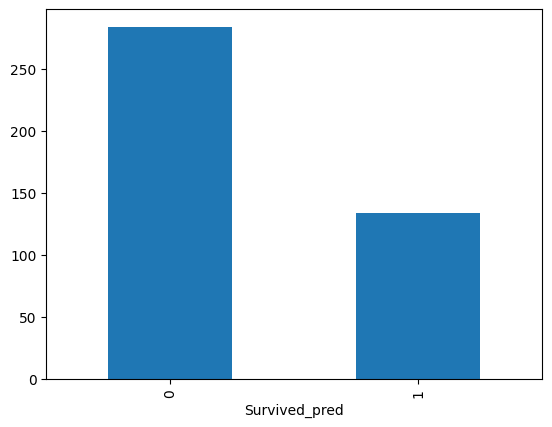

In [72]:

df_final['Survived_pred'].value_counts().plot(kind='bar')

In [73]:
df_final.to_csv('Results.csv', index=True)